In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1

In [15]:
data_A = pd.read_csv("Final_Project/datasets/DetectorA.csv")
data_B = pd.read_csv("Final_Project/datasets/DetectorB.csv")
data_C = pd.read_csv("Final_Project/datasets/DetectorC.csv")
data_Target = pd.read_csv("Final_Project/datasets/DetectorTarget.csv")


# Step 2

In [19]:
data_A.keys()

Index(['id', 'cnn_score', 'energy'], dtype='object')

In [20]:
energy_A = data_A.values[:, 2]

In [21]:
cut_energy_A = energy_A[data_A.values[:,1]>0.15]

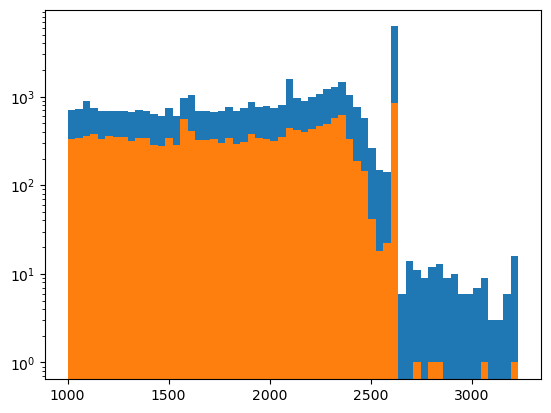

In [44]:
total_SS_counts, total_SS_bins, total_SS_width = plt.hist(energy_A, bins=60, log="log")
SS_counts, SS_bins, SS_bwidth =plt.hist(cut_energy_A, bins=60, log="log")

In [37]:
A_peak_mask_cut = (cut_energy_A >= 1590.)& (cut_energy_A <= 1595.)
A_base_mask_cut = (cut_energy_A > 1585.)& (cut_energy_A < 1590.)
A_peak_mask = (energy_A >= 1590.)& (energy_A <= 1595.)
A_base_mask = (energy_A > 1585.)& (energy_A < 1590.)

In [38]:
tau = (1595. - 1590.)/(1590. - 1585.)

In [41]:
len(cut_energy_A[A_peak_mask_cut]), len(cut_energy_A[A_base_mask_cut]), len(energy_A[A_peak_mask]), len(energy_A[A_base_mask])

(329, 46, 454, 86)

In [42]:
eff = (len(cut_energy_A[A_peak_mask_cut]) - tau*len(cut_energy_A[A_base_mask_cut]))/ \
    (len(energy_A[A_peak_mask]) - tau*len(energy_A[A_base_mask]))
            

In [46]:
print(f'The true positive rate with the classification score {0.15}  is {np.round(eff,3)*100}%')

The true positive rate with the classification score 0.15  is 76.9%


# Step 3

We need same cut as step two. Apply cut to actual events, not histrograms. Find efficiency same way and that's our false positive.

In [9]:
data_B.keys()

Index(['id', 'cnn_score', 'energy'], dtype='object')

In [47]:
energy_B = data_B.values[:, 2]

In [48]:
cut_energy_B = energy_B[data_B.values[:,1]> 0.15]

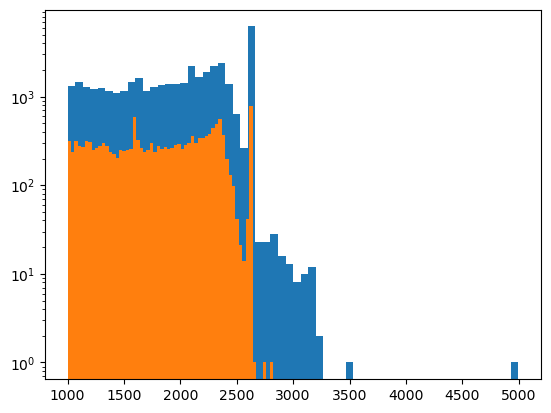

In [49]:
total_MS_counts, total_MS_bins, total_MS_width = plt.hist(energy_B, bins=60, log="log")
MS_counts, MS_bins, MS_bwidth =plt.hist(cut_energy_B, bins=60, log="log")

In [61]:
B_peak_mask_cut = (cut_energy_B >= 2101.)& (cut_energy_B <= 2105.)
Bleft_base_mask_cut = (cut_energy_B > 2016.)& (cut_energy_B < 2101.)
Bright_base_mask_cut = (cut_energy_B > 2105.)& (cut_energy_B < 2110.)

In [58]:
B_peak_mask = (energy_B >= 2101.)& (energy_B <= 2105.)
Bleft_base_mask = (energy_B > 2016.)& (energy_B < 2101.)
Bright_base_mask = (energy_B > 2105.)& (energy_B < 2110.)

In [54]:
tau = ( 2105. - 2101.)/ ((2101. - 2016. )+ (2110. - 2105))

In [65]:
eff_B = ( len(cut_energy_B[B_peak_mask_cut]) - \
         tau*len(cut_energy_B[Bleft_base_mask_cut | Bright_base_mask_cut]) ) / \
            (len(energy_B[B_peak_mask]) - tau* len( energy_B[Bleft_base_mask | Bright_base_mask ]))


In [66]:
print(f'The true positive rate with the classification score {0.15}  is {np.round(eff_B,3)*100}%')

The true positive rate with the classification score 0.15  is 7.8%


# Step 4

In [107]:
def NLDBDpdf(E_min, E_max, n_bins, E_0, sigma, thetaNLDBD):
    # Implement your code below
    E_bins = np.linspace(E_min, E_max, n_bins + 1)
    E_centers = (E_bins[:-1] + E_bins[1:]) / 2  # Bin centers
    bin_width = E_bins[1] - E_bins[0]  # Width of each bin
    
    pdf = thetaNLDBD * bin_width * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((E_centers - E_0) ** 2) / (2 * sigma**2))
    #hist = np.histogram(data, bins=40)
    signal_counts = S_E

    energies = E_centers
    #energies = (hist[1][1:]+hist[1][:-1])/2 #bin centers

    return pdf

In [108]:
def gaussian(E_min, E_max, n_bins, E_0, sigma, theta):

    # Implement your code below
    E_bins = np.linspace(E_min, E_max, n_bins + 1)
    E_centers = (E_bins[:-1] + E_bins[1:]) / 2  # Bin centers
    bin_width = E_bins[1] - E_bins[0]  # Width of each bin
    
    pdf = thetaA * bin_width * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((E_centers - E_0) ** 2) / (2 * sigma**2))
    counts = pdf

    energies = E_centers

    return pdf#, energies, counts

In [109]:
def linear_bkg(E_min, E_max, n_bins, B, C):
    # Implement your code below
    E_bins = np.linspace(E_min, E_max, n_bins + 1)
    E_centers = (E_bins[:-1] + E_bins[1:]) / 2  # Bin centers
    bin_width = E_bins[1] - E_bins[0]  # Width of each bin
    
    pdf = B*E_centers + C

    return pdf

In [110]:
def bkg_exp(E_min, E_max, n_bins, F, D):
    E_bins = np.linspace(E_min, E_max, n_bins + 1)
    E_centers = (E_bins[:-1] + E_bins[1:]) / 2  # Bin centers
    bin_width = E_bins[1] - E_bins[0]  # Width of each bin
    
    pdf = F*np.exp(-E_centers/D)*bin_width
    return pdf

In [111]:
sigmaA = np.sqrt(100.)
sigmaB = np.sqrt(270.)
sigmaC = 1
nbins = 60
SSpeak = 1592.
MSpeak = 2103.
NLDBDpeak = 2039.
thetaA = 1350.
thetaB = 770.
sigmaNLDBD = 1
Emin = np.min(data_Target.values[:,2])
Emax = np.max(data_Target.values[:,2])
SS_Emin = 1580
SS_Emax = 1600
MS_Emin = 2090
MS_Emax = 2010
NLDBDmin = 2030
NLDBDmax = 2048
Exp_Emin = 2400
Exp_max = 2600
def fullFit(A, B, thetaNLDBD, F, D, thetaC ):
    fit = thetaC* ( linear_bkg(Emin, Emax, nbins, A, B) + gaussian(SS_Emin, SS_Emax, nbins, SSpeak, sigmaA, thetaA) + \
        gaussian(NLDBDmin, NLDBDmax, nbins, NLDBDpeak, sigmaNLDBD, thetaNLDBD) + \
            gaussian(MS_Emin, MS_Emax, nbins, MSpeak, sigmaB, thetaB) + bkg_exp(Exp_Emin, Exp_max, nbins, F, D) )
    return fit 



In [114]:
linear_bkg(Emin, Emax, nbins, A, B) + gaussian(SS_Emin, SS_Emax, nbins, SSpeak, sigmaA, thetaA) + \
gaussian(NLDBDmin, NLDBDmax, nbins, NLDBDpeak, sigmaNLDBD, thetaNLDBD) + gaussian(MS_Emin, MS_Emax, nbins, MSpeak, sigmaB, thetaB) +\
bkg_exp(Exp_Emin, Exp_max, nbins, F, D) 



array([ 997.41210695, 1036.53806446, 1075.69909126, 1114.86503885,
       1154.00796077, 1193.10261944, 1232.1268652 , 1271.06188461,
       1309.89232078, 1348.60627436, 1387.19519926, 1425.65371636,
       1463.97939466, 1502.17263783, 1540.23709158, 1578.18175102,
       1616.0277158 , 1653.82584169, 1691.69591037, 1729.8998805 ,
       1768.95277461, 1809.74347799, 1853.58186296, 1902.03472862,
       1956.42512566, 2017.01549293, 2082.16384631, 2147.9773478 ,
       2208.94324875, 2259.56882353, 2296.40858015, 2319.46520987,
       2332.18964111, 2340.08019491, 2348.65547053, 2361.81449377,
       2381.20583535, 2406.5740776 , 2436.60363002, 2469.73556074,
       2504.66819876, 2540.52107696, 2576.78764389, 2613.21425376,
       2649.68902258, 2686.16827802, 2722.63705481, 2759.09108156,
       2795.52964914, 2831.95312629, 2868.36219111, 2904.75761787,
       2941.1402226 , 2977.51084874, 3013.87036179, 3050.21964545,
       3086.55959779, 3122.8911275 , 3159.21514989, 3195.53258

In [115]:
A = 1
B = 1
thetaNLDBD = 1
F = 1
D = 1
thetaC = 1
fullFit(A, B, thetaNLDBD, F, D, thetaC )

array([ 997.41210695, 1036.53806446, 1075.69909126, 1114.86503885,
       1154.00796077, 1193.10261944, 1232.1268652 , 1271.06188461,
       1309.89232078, 1348.60627436, 1387.19519926, 1425.65371636,
       1463.97939466, 1502.17263783, 1540.23709158, 1578.18175102,
       1616.0277158 , 1653.82584169, 1691.69591037, 1729.8998805 ,
       1768.95277461, 1809.74347799, 1853.58186296, 1902.03472862,
       1956.42512566, 2017.01549293, 2082.16384631, 2147.9773478 ,
       2208.94324875, 2259.56882353, 2296.40858015, 2319.46520987,
       2332.18964111, 2340.08019491, 2348.65547053, 2361.81449377,
       2381.20583535, 2406.5740776 , 2436.60363002, 2469.73556074,
       2504.66819876, 2540.52107696, 2576.78764389, 2613.21425376,
       2649.68902258, 2686.16827802, 2722.63705481, 2759.09108156,
       2795.52964914, 2831.95312629, 2868.36219111, 2904.75761787,
       2941.1402226 , 2977.51084874, 3013.87036179, 3050.21964545,
       3086.55959779, 3122.8911275 , 3159.21514989, 3195.53258

# Step 5

Apply cut, then generate PDF of detectors A, B, and C and DetectorTarget histogram.

In [76]:
cut_thresh = 0.15

In [77]:
data_A_with_cut = data_A.loc[(data_A['cnn_score']>cut_thresh)]
data_B_with_cut = data_B.loc[(data_B['cnn_score']>cut_thresh)]
data_C_with_cut = data_C.loc[(data_C['cnn_score']>cut_thresh)]
data_Target_with_cut = data_Target.loc[(data_B['cnn_score']>cut_thresh)]

## Plots

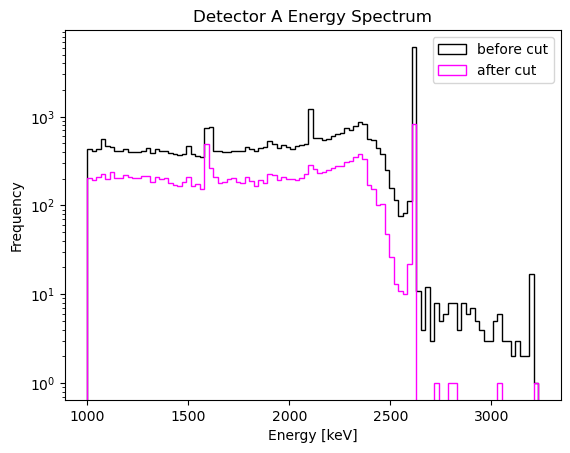

In [78]:
plt.figure()
ax = data_A['energy'].plot(
    kind='hist', 
    title='Detector A Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_A_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()


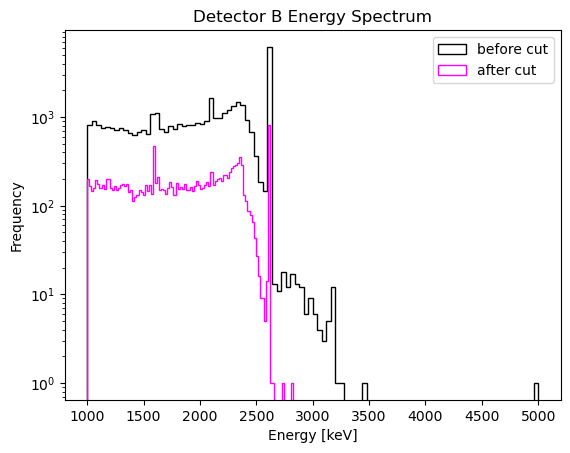

In [79]:
plt.figure()
ax = data_B['energy'].plot(
    kind='hist', 
    title='Detector B Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_B_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()

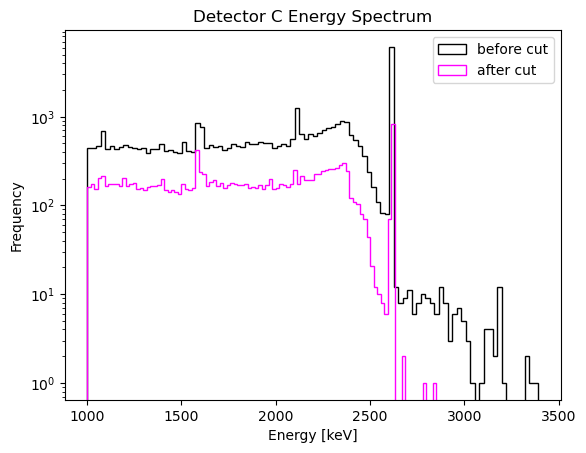

In [80]:
plt.figure()
ax = data_C['energy'].plot(
    kind='hist', 
    title='Detector C Energy Spectrum', 
    bins=100, 
    logy=True, 
    histtype='step',
    label='before cut',
    xlabel="Energy [keV]",
    color="black"
)

data_C_with_cut['energy'].plot(
    kind='hist', 
    ax=ax, 
    bins=100, 
    histtype='step',
    logy=True, 
    label='after cut',
    xlabel="Energy [keV]",
    color="magenta"
)

plt.legend()
plt.show()

# Step 6

In [117]:
import iminuit

ModuleNotFoundError: No module named 'iminuit'

array([[<Axes: title={'center': 'energy'}>]], dtype=object)

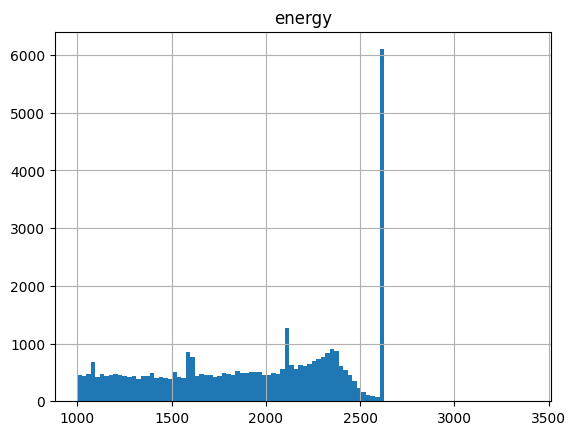

In [13]:
data_C.hist(column="energy", bins=100)

array([[<Axes: title={'center': 'energy'}>]], dtype=object)

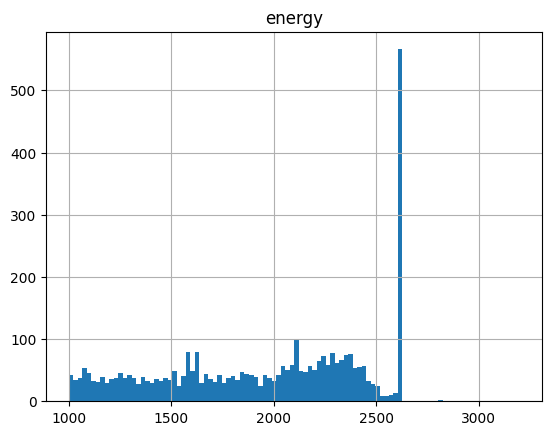

In [12]:
data_Target.hist(column="energy", bins=100)